### Project Author- Jeswyn Jas

# Street View Housing Number Digit Recognition

## Problem Statement 

**NEURAL NETWORK**

<b>Domain</b>

Autonomous Vehicles, Neural Networks

### Context

Recognizing multi-digit numbers in photographs captured at street level is an important component of modern-day map making. A classic example of a corpus of such street level photographs is Google’s Street View imagery composed of hundreds of millions of geo-located 360-degree panoramic images.

The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents. More broadly, recognizing numbers in photographs is a problem of interest to the optical character recognition community.

While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large range of fonts, colours, styles, orientations, and character arrangements.

The recognition problem is further complicated by environmental factors such as lighting, shadows, specularities, and occlusions as well as by image acquisition factors such as resolution, motion, and focus blurs. In this project, we will use the dataset with images centred around a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simpler, it is more complex than MNIST because of the distractors

## OBJECTIVE
We will build a digit classifier on the SVHN (Street View Housing Number) dataset

### Dataset description

SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with the minimal requirement on data formatting but comes from a significantly harder, unsolved, real-world problem (recognizing digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.

### IMPORTING NECCESARY LIBRARIES

In [1]:
# Basic packages
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
import matplotlib.style as style; style.use('fivethirtyeight')
%matplotlib inline

# Metrics and preprocessing (SKlearn)
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# TF and Keras
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers

### Loading train, val and test datasets from h5py file SVHN_single_grey1.h5 

In [2]:
h5f = h5py.File(r'C:\Users\user\OneDrive\Documents\SVHN_single_grey1.h5','r')

In [3]:
h5f.keys() 

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [4]:
# Load the training, validation and test sets
X_train = h5f['X_train'][:]
y_train_o = h5f['y_train'][:]
X_val = h5f['X_val'][:]
y_val_o = h5f['y_val'][:]
X_test = h5f['X_test'][:]
y_test_o = h5f['y_test'][:]

# Close this file

h5f.close()


print('Training set', X_train.shape, y_train_o.shape)
print('Validation set', X_val.shape, y_val_o.shape)
print('Test set', X_test.shape, y_test_o.shape)

print('\n')
print('Unique labels in y_train:', np.unique(y_train_o))
print('Unique labels in y_val:', np.unique(y_val_o))
print('Unique labels in y_test:', np.unique(y_test_o)) 

Training set (42000, 32, 32) (42000,)
Validation set (60000, 32, 32) (60000,)
Test set (18000, 32, 32) (18000,)


Unique labels in y_train: [0 1 2 3 4 5 6 7 8 9]
Unique labels in y_val: [0 1 2 3 4 5 6 7 8 9]
Unique labels in y_test: [0 1 2 3 4 5 6 7 8 9]


#### Insights - Sets Shape

Length of training sets: 42,000, validation sets: 60,0000, test sets: 18,0000

Size of the images: 32*32

Number of class: 10 

### Dataset Visualization 

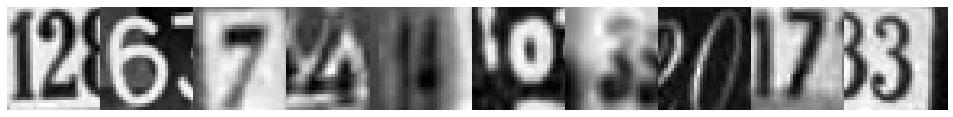

Label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [5]:
#Visualizing first 10 images
plt.figure(figsize = (15, 7.5))
for i in range(10):  
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape((32, 32)),cmap = plt.cm.binary)
    plt.axis('off')
plt.subplots_adjust(wspace = -0.1, hspace = -0.1)
plt.show()

print('Label for each of the above image: %s' % (y_train_o[0 : 10])) 

Checking first image and label in training set
--------------------------------------------------------------------------------


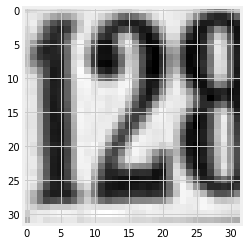

Label: 2


In [6]:
# To check the fisrt image and label in training set
print('Checking first image and label in training set'); print('--'*40)
plt.imshow(X_train[0], cmap = plt.cm.binary)    
plt.show()
print('Label:', y_train_o[0]) 

Checking first image and label in validation set
--------------------------------------------------------------------------------


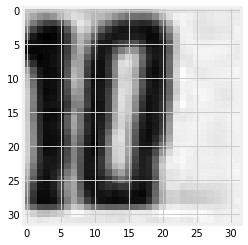

Label: 0


In [7]:
# To check the first image and label in validation set
print('Checking first image and label in validation set'); print('--'*40)
plt.imshow(X_val[0], cmap = plt.cm.binary)    
plt.show()
print('Label:', y_val_o[0]) 

Checking first image and label in test set
--------------------------------------------------------------------------------


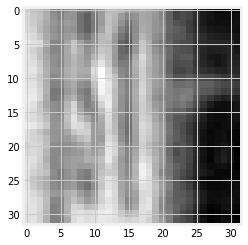

Label: 1


In [8]:
# To check the first image and label in test set
print('Checking first image and label in test set'); print('--'*40)
plt.imshow(X_test[0], cmap = plt.cm.binary)    
plt.show()
print('Label:', y_test_o[0]) 

### Reshape and normalize the train and test features so that the same can be fed for model building. We need to feed a 2D tensor into the model and currently we have a 3D tensor 

### To flatten and normalize the images for Keras 

In [9]:
print('Reshaping X data: (n, 32, 32) => (n, 1024)'); print('--'*40)
X_train = X_train.reshape((X_train.shape[0], -1))
X_val = X_val.reshape((X_val.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

print('Making sure that the values are float so that we can get decimal points after division'); print('--'*40)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

print('Normalizing the RGB codes by dividing it to the max RGB value'); print('--'*40)
X_train /= 255
X_val /= 255
X_test /= 255



Reshaping X data: (n, 32, 32) => (n, 1024)
--------------------------------------------------------------------------------
Making sure that the values are float so that we can get decimal points after division
--------------------------------------------------------------------------------
Normalizing the RGB codes by dividing it to the max RGB value
--------------------------------------------------------------------------------


In [10]:
print('X_train shape:', X_train.shape)
print('X_val shape:', X_val.shape)
print('X_test shape:', X_test.shape)

print('\n')
print('y_train shape:', y_train_o.shape)
print('y_val shape:', y_val_o.shape)
print('y_test shape:', y_test_o.shape)

print('\n')
print('Number of images in X_train', X_train.shape[0])
print('Number of images in X_val', X_val.shape[0])
print('Number of images in X_test', X_test.shape[0]) 

X_train shape: (42000, 1024)
X_val shape: (60000, 1024)
X_test shape: (18000, 1024)


y_train shape: (42000,)
y_val shape: (60000,)
y_test shape: (18000,)


Number of images in X_train 42000
Number of images in X_val 60000
Number of images in X_test 18000


### One hot encode the labels for train and test data 

In [11]:
print('Converting y data into categorical (one-hot encoding)'); print('--'*40)
y_train = to_categorical(y_train_o)
y_val = to_categorical(y_val_o)
y_test = to_categorical(y_test_o) 

Converting y data into categorical (one-hot encoding)
--------------------------------------------------------------------------------


In [12]:
y_train.dtype 

dtype('float32')

In [13]:
y_test 

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

## Define the model architecture using TensorFlow with a flatten layer followed by dense layers with activation as ReLu and softmax 

### Model Building - Baby sitting the learning process 

#### Fully connected linear layer

In [14]:
class Linear():
    def __init__(self, in_size, out_size):
        self.W = np.random.randn(in_size, out_size) * 0.01
        self.b = np.zeros((1, out_size))
        self.params = [self.W, self.b]
        self.gradW = None
        self.gradB = None
        self.gradInput = None        

    def forward(self, X):
        self.X = X
        self.output = np.dot(X, self.W) + self.b
        return self.output

    def backward(self, nextgrad):
        self.gradW = np.dot(self.X.T, nextgrad)
        self.gradB = np.sum(nextgrad, axis=0)
        self.gradInput = np.dot(nextgrad, self.W.T)
        return self.gradInput, [self.gradW, self.gradB] 

#### ReLU 

In [15]:
class ReLU():
    def __init__(self):
        self.params = []
        self.gradInput = None

    def forward(self, X):
        self.output = np.maximum(X, 0)
        return self.output

    def backward(self, nextgrad):
        self.gradInput = nextgrad.copy()
        self.gradInput[self.output <=0] = 0
        return self.gradInput, [] 

#### Softmax Function 

In [16]:
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True) 

#### Cross Entropy Loss 

In [17]:
class CrossEntropy:
    def forward(self, X, y):
        self.m = y.shape[0]
        self.p = softmax(X)
        cross_entropy = -np.log(self.p[range(self.m), y]+1e-16)
        loss = np.sum(cross_entropy) / self.m
        return loss
    
    def backward(self, X, y):
        y_idx = y.argmax()        
        grad = softmax(X)
        grad[range(self.m), y] -= 1
        grad /= self.m
        return grad 

### NN class that enables the forward prop and backward propagation of the entire network 

In [18]:
class NN():
    def __init__(self, lossfunc = CrossEntropy(), mode = 'train'):
        self.params = []
        self.layers = []
        self.loss_func = lossfunc
        self.grads = []
        self.mode = mode
        
    def add_layer(self, layer):
        self.layers.append(layer)
        self.params.append(layer.params)

    def forward(self, X):
        for layer in self.layers:
            X = layer.forward(X)
        return X
    
    def backward(self, nextgrad):
        self.clear_grad_param()
        for layer in reversed(self.layers):
            nextgrad, grad = layer.backward(nextgrad)
            self.grads.append(grad)
        return self.grads
    
    def train_step(self, X, y):
        out = self.forward(X)
        loss = self.loss_func.forward(out,y)
        nextgrad = self.loss_func.backward(out,y)
        grads = self.backward(nextgrad)
        return loss, grads
    
    def predict(self, X):
        X = self.forward(X)
        p = softmax(X)
        return np.argmax(p, axis=1)
    
    def predict_scores(self, X):
        X = self.forward(X)
        p = softmax(X)
        return p
    
    def clear_grad_param(self):
        self.grads = [] 

In [19]:
def update(velocity, params, grads, learning_rate=0.01, mu=0.9):
    for v, p, g, in zip(velocity, params, reversed(grads)):
        for i in range(len(g)):
            v[i] = (mu * v[i]) - (learning_rate * g[i])
            p[i] += v[i] 

#### mini batches 

In [20]:
def minibatch(X, y, minibatch_size):
    n = X.shape[0]
    minibatches = []
    permutation = np.random.permutation(X.shape[0])
    X = X[permutation]
    y = y[permutation]
    
    for i in range(0, n , minibatch_size):
        X_batch = X[i:i + minibatch_size, :]
        y_batch = y[i:i + minibatch_size, ]
        minibatches.append((X_batch, y_batch))
        
    return minibatches 

#### Training Loop 

In [21]:
def train(net, X_train, y_train, minibatch_size, epoch, learning_rate, mu = 0.9, X_val = None, y_val = None, Lambda = 0, verb = True):
    val_loss_epoch = []
    minibatches = minibatch(X_train, y_train, minibatch_size)
    minibatches_val = minibatch(X_val, y_val, minibatch_size)
    
    for i in range(epoch):
        loss_batch = []
        val_loss_batch = []
        velocity = []
        for param_layer in net.params:
            p = [np.zeros_like(param) for param in list(param_layer)]
            velocity.append(p)
            
        # iterate over mini batches
        for X_mini, y_mini in minibatches:
            loss, grads = net.train_step(X_mini, y_mini)
            loss_batch.append(loss)
            update(velocity, net.params, grads, learning_rate=learning_rate, mu=mu)

        for X_mini_val, y_mini_val in minibatches_val:
            val_loss, _ = net.train_step(X_mini, y_mini)
            val_loss_batch.append(val_loss)
        
        # accuracy of model at end of epoch after all mini batch updates
        m_train = X_train.shape[0]
        m_val = X_val.shape[0]
        y_train_pred = []
        y_val_pred = []
        y_train1 = []
        y_vall = []
        for ii in range(0, m_train, minibatch_size):
            X_tr = X_train[ii:ii + minibatch_size, : ]
            y_tr = y_train[ii:ii + minibatch_size,]
            y_train1 = np.append(y_train1, y_tr)
            y_train_pred = np.append(y_train_pred, net.predict(X_tr))

        for ii in range(0, m_val, minibatch_size):
            X_va = X_val[ii:ii + minibatch_size, : ]
            y_va = y_val[ii:ii + minibatch_size,]
            y_vall = np.append(y_vall, y_va)
            y_val_pred = np.append(y_val_pred, net.predict(X_va))
            
        train_acc = check_accuracy(y_train1, y_train_pred)
        val_acc = check_accuracy(y_vall, y_val_pred)
        
        ## weights
        w = np.array(net.params[0][0])
        
        ## adding regularization to cost
        mean_train_loss = (sum(loss_batch) / float(len(loss_batch)))
        mean_val_loss = sum(val_loss_batch) / float(len(val_loss_batch))
        
        val_loss_epoch.append(mean_val_loss)
        if verb:
            if i%50==0:
                print("Epoch {3}/{4}: Loss = {0} | Training Accuracy = {1}".format(mean_train_loss, train_acc, val_acc, i, epoch))
    return net, val_acc 

In [22]:
def check_accuracy(y_true, y_pred):
    return np.mean(y_pred == y_true) 

In [23]:
# Invoking the model
## input size
input_dim = X_train.shape[1]

def train_and_test_loop(iterations, lr, Lambda, verb = True):
    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes1 = 10
    output_nodes = 10

    ## define neural net
    nn = NN()
    nn.add_layer(Linear(input_dim, hidden_nodes1))

    nn, val_acc = train(nn, X_train, y_train_o, minibatch_size = 200, epoch = iterations, learning_rate = learning_rate,\
                      X_val = X_test, y_val = y_test_o, Lambda = Lambda, verb = verb)
    return val_acc 

In [24]:
lr = 0.00001
Lambda = 0
train_and_test_loop(1, lr, Lambda) 

Epoch 0/1: Loss = 2.3079164868829274 | Training Accuracy = 0.10371428571428572


0.10455555555555555

In [25]:
lr = 0.00001
Lambda = 1e3
train_and_test_loop(1, lr, Lambda) 

Epoch 0/1: Loss = 2.306912478342516 | Training Accuracy = 0.09935714285714285


0.09938888888888889

In [26]:
X_train_subset = X_train[0:20]
y_train_subset = y_train_o[0:20]

X_train = X_train_subset
y_train_o = y_train_subset

X_train.shape, y_train_o.shape

((20, 1024), (20,))

In [27]:
%time
lr = 0.001
Lambda = 0
train_and_test_loop(5000, lr, Lambda)

Wall time: 0 ns
Epoch 0/5000: Loss = 2.2879735672752224 | Training Accuracy = 0.2
Epoch 50/5000: Loss = 1.9231154043278456 | Training Accuracy = 0.35
Epoch 100/5000: Loss = 1.8418789053703837 | Training Accuracy = 0.3
Epoch 150/5000: Loss = 1.7889959151867814 | Training Accuracy = 0.45
Epoch 200/5000: Loss = 1.7446559267939037 | Training Accuracy = 0.45
Epoch 250/5000: Loss = 1.704630716460907 | Training Accuracy = 0.5
Epoch 300/5000: Loss = 1.667381966716573 | Training Accuracy = 0.5
Epoch 350/5000: Loss = 1.6321922695900852 | Training Accuracy = 0.5
Epoch 400/5000: Loss = 1.5986719102368967 | Training Accuracy = 0.5
Epoch 450/5000: Loss = 1.5665831069729235 | Training Accuracy = 0.55
Epoch 500/5000: Loss = 1.5357660389729602 | Training Accuracy = 0.55
Epoch 550/5000: Loss = 1.5061043262991503 | Training Accuracy = 0.55
Epoch 600/5000: Loss = 1.477507638604552 | Training Accuracy = 0.6
Epoch 650/5000: Loss = 1.449902346779413 | Training Accuracy = 0.6
Epoch 700/5000: Loss = 1.42322619

0.1356111111111111

In [28]:
lr = 1e-7
Lambda = 1e-7
train_and_test_loop(500, lr, Lambda)

Epoch 0/500: Loss = 2.3346488048933187 | Training Accuracy = 0.05
Epoch 50/500: Loss = 2.3345464418972273 | Training Accuracy = 0.05
Epoch 100/500: Loss = 2.334444102803384 | Training Accuracy = 0.05
Epoch 150/500: Loss = 2.334341787607776 | Training Accuracy = 0.05
Epoch 200/500: Loss = 2.334239496306393 | Training Accuracy = 0.05
Epoch 250/500: Loss = 2.3341372288952225 | Training Accuracy = 0.05
Epoch 300/500: Loss = 2.3340349853702516 | Training Accuracy = 0.05
Epoch 350/500: Loss = 2.333932765727467 | Training Accuracy = 0.05
Epoch 400/500: Loss = 2.3338305699628545 | Training Accuracy = 0.05
Epoch 450/500: Loss = 2.3337283980724015 | Training Accuracy = 0.05


0.10133333333333333

In [29]:
lr = 0.001
Lambda = 1e-7
train_and_test_loop(500, lr, Lambda)

Epoch 0/500: Loss = 2.2786466670756846 | Training Accuracy = 0.15
Epoch 50/500: Loss = 1.9135393060885142 | Training Accuracy = 0.25
Epoch 100/500: Loss = 1.8293744097558857 | Training Accuracy = 0.35
Epoch 150/500: Loss = 1.7760364160333872 | Training Accuracy = 0.45
Epoch 200/500: Loss = 1.7317208780997402 | Training Accuracy = 0.45
Epoch 250/500: Loss = 1.6917893180928438 | Training Accuracy = 0.5
Epoch 300/500: Loss = 1.6546341588287263 | Training Accuracy = 0.55
Epoch 350/500: Loss = 1.6195302369248974 | Training Accuracy = 0.55
Epoch 400/500: Loss = 1.5860914789441816 | Training Accuracy = 0.55
Epoch 450/500: Loss = 1.5540849661071274 | Training Accuracy = 0.55


0.10888888888888888

In [30]:
import math
for k in range(1, 10):
    lr = math.pow(10, np.random.uniform(-3.0, -2.0))
    Lambda = math.pow(10, np.random.uniform(-5, 2))
    best_acc = train_and_test_loop(100, lr, Lambda, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 10, best_acc, lr, Lambda))

Try 1/10: Best_val_acc: 0.10238888888888889, lr: 0.0013707644653320073, Lambda: 0.00031566199472697723

Try 2/10: Best_val_acc: 0.10388888888888889, lr: 0.004039602153031447, Lambda: 0.00031940645310839244

Try 3/10: Best_val_acc: 0.10144444444444445, lr: 0.002806621033070606, Lambda: 0.1064902866804325

Try 4/10: Best_val_acc: 0.10461111111111111, lr: 0.004651597028915261, Lambda: 0.24188574801993032

Try 5/10: Best_val_acc: 0.10816666666666666, lr: 0.007527046857236646, Lambda: 0.001201373327476265

Try 6/10: Best_val_acc: 0.11044444444444444, lr: 0.009598547751662526, Lambda: 0.0017694895732593256

Try 7/10: Best_val_acc: 0.10938888888888888, lr: 0.003336804936740896, Lambda: 0.005906039697423015

Try 8/10: Best_val_acc: 0.10955555555555556, lr: 0.007607084432982394, Lambda: 0.017746326075799262

Try 9/10: Best_val_acc: 0.10711111111111112, lr: 0.003116451483967154, Lambda: 0.08296284173261394



## NN Model with reLu activation and Adam Optimizer 

In [31]:
print('NN model with sigmoid activations'); print('--'*40)
# Initialize the neural network classifier
model1 = Sequential()

# Input Layer - adding input layer and activation functions sigmoid
model1.add(Dense(128, input_shape = (1024, )))
# Adding activation function
model1.add(Activation('sigmoid'))

#Hidden Layer 1 - adding first hidden layer
model1.add(Dense(64))
# Adding activation function
model1.add(Activation('sigmoid'))

# Output Layer - adding output layer which is of 10 nodes (digits)
model1.add(Dense(10))
# Adding activation function - softmax for multiclass classification
model1.add(Activation('softmax'))

NN model with sigmoid activations
--------------------------------------------------------------------------------


In [32]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               131200    
_________________________________________________________________
activation (Activation)      (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 140,106
Trainable params: 140,106
Non-trainable params: 0
__________________________________________________

In [34]:
%time
print('NN model with relu activations and adam optimizers'); print('--'*40)
# Initialize the neural network classifier
model2 = Sequential()

# Input Layer - adding input layer and activation functions relu
model2.add(Dense(128, input_shape = (1024, )))
# Adding activation function
model2.add(Activation('relu'))

#Hidden Layer 1 - adding first hidden layer
model2.add(Dense(64))
# Adding activation function
model2.add(Activation('relu'))

# Output Layer - adding output layer which is of 10 nodes (digits)
model2.add(Dense(10))
# Adding activation function - softmax for multiclass classification
model2.add(Activation('softmax')) 

Wall time: 0 ns
NN model with relu activations and adam optimizers
--------------------------------------------------------------------------------


In [37]:

h5_SVH = h5py.File(r'C:\Users\user\OneDrive\Documents\SVHN_single_grey1.h5','r')
# Load the training, validation and test sets
X_train = h5_SVH['X_train'][:]
y_train_o = h5_SVH['y_train'][:]
X_val = h5_SVH['X_val'][:]
y_val_o = h5_SVH['y_val'][:]
X_test = h5_SVH['X_test'][:]
y_test_o = h5_SVH['y_test'][:]

print('Reshaping X data: (n, 32, 32) => (n, 1024)'); print('--'*40)
X_train = X_train.reshape((X_train.shape[0], -1))
X_val = X_val.reshape((X_val.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

print('Making sure that the values are float so that we can get decimal points after division'); print('--'*40)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

print('Normalizing the RGB codes by dividing it to the max RGB value'); print('--'*40)
X_train /= 255
X_val /= 255
X_test /= 255

print('Converting y data into categorical (one-hot encoding)'); print('--'*40)
y_train = to_categorical(y_train_o)
y_val = to_categorical(y_val_o)
y_test = to_categorical(y_test_o)


Reshaping X data: (n, 32, 32) => (n, 1024)
--------------------------------------------------------------------------------
Making sure that the values are float so that we can get decimal points after division
--------------------------------------------------------------------------------
Normalizing the RGB codes by dividing it to the max RGB value
--------------------------------------------------------------------------------
Converting y data into categorical (one-hot encoding)
--------------------------------------------------------------------------------


In [35]:
model2.summary() 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               131200    
_________________________________________________________________
activation_3 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
activation_4 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
_________________________________________________________________
activation_5 (Activation)    (None, 10)                0         
Total params: 140,106
Trainable params: 140,106
Non-trainable params: 0
________________________________________________

In [38]:
%time
print('NN model with relu activations and adam optimizer'); print('--'*40)
# compiling the neural network classifier, adam optimizer
adam = optimizers.Adam(lr = 0.01)
model2.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the neural network for training
history = model2.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 100, verbose = 1) 

Wall time: 0 ns
NN model with relu activations and adam optimizer
--------------------------------------------------------------------------------
Epoch 1/100
210/210 [==============================] - 1s 5ms/step - loss: 2.3687 - accuracy: 0.1008 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 2/100
210/210 [==============================] - 1s 3ms/step - loss: 2.3029 - accuracy: 0.1007 - val_loss: 2.3033 - val_accuracy: 0.1000
Epoch 3/100
210/210 [==============================] - 1s 3ms/step - loss: 2.3030 - accuracy: 0.1017 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 4/100
210/210 [==============================] - 1s 3ms/step - loss: 2.3032 - accuracy: 0.0973 - val_loss: 2.3031 - val_accuracy: 0.1000
Epoch 5/100
210/210 [==============================] - 1s 3ms/step - loss: 2.3032 - accuracy: 0.0989 - val_loss: 2.3035 - val_accuracy: 0.1000
Epoch 6/100
210/210 [==============================] - 1s 4ms/step - loss: 2.3031 - accuracy: 0.1008 - val_loss: 2.3030 - val_accuracy: 0.

In [39]:
%time
print('NN model with relu activations and adam optimizer'); print('--'*40)
# compiling the neural network classifier, adam optimizer
adam = optimizers.Adam(lr = 0.001)
model2.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the neural network for training
history = model2.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 100, verbose = 1) 

Wall time: 0 ns
NN model with relu activations and adam optimizer
--------------------------------------------------------------------------------
Epoch 1/100
210/210 [==============================] - 1s 4ms/step - loss: 2.3029 - accuracy: 0.0997 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/100
210/210 [==============================] - 1s 4ms/step - loss: 2.3027 - accuracy: 0.0999 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/100
210/210 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1019 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/100
210/210 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1016 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/100
210/210 [==============================] - 1s 3ms/step - loss: 2.3027 - accuracy: 0.1013 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/100
210/210 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1019 - val_loss: 2.3026 - val_accuracy: 0.

In [40]:
print('Evaluate NN model with relu activations'); print('--'*40)
results2 = model2.evaluate(X_val, y_val)
print('Validation accuracy: {}'.format(round(results2[1]*100, 2), '%')) 

Evaluate NN model with relu activations
--------------------------------------------------------------------------------
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3026 - accuracy: 0.1000
Validation accuracy: 10.0


In [41]:
print('NN model with relu activations and changing number of activators'); print('--'*40)
# Initialize the neural network classifier
model3 = Sequential()

# Input Layer - adding input layer and activation functions relu
model3.add(Dense(256, input_shape = (1024, )))
# Adding activation function
model3.add(Activation('relu'))

#Hidden Layer 1 - adding first hidden layer
model3.add(Dense(128))
# Adding activation function
model3.add(Activation('relu'))

#Hidden Layer 2 - Adding second hidden layer
model3.add(Dense(64))
# Adding activation function
model3.add(Activation('relu'))

# Output Layer - adding output layer which is of 10 nodes (digits)
model3.add(Dense(10))
# Adding activation function - softmax for multiclass classification
model3.add(Activation('softmax')) 

NN model with relu activations and changing number of activators
--------------------------------------------------------------------------------


In [42]:
model3.summary() 

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               262400    
_________________________________________________________________
activation_6 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
activation_7 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
activation_8 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

In [43]:
# compiling the neural network classifier, adam optimizer
adam = optimizers.Adam(lr = 0.001)
model3.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the neural network for training 
history = model3.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 100, verbose = 1)

Epoch 1/100
210/210 [==============================] - 1s 7ms/step - loss: 2.2804 - accuracy: 0.1313 - val_loss: 2.1425 - val_accuracy: 0.2257
Epoch 2/100
210/210 [==============================] - 1s 7ms/step - loss: 1.8093 - accuracy: 0.3631 - val_loss: 1.5236 - val_accuracy: 0.4864
Epoch 3/100
210/210 [==============================] - 1s 6ms/step - loss: 1.3509 - accuracy: 0.5674 - val_loss: 1.1959 - val_accuracy: 0.6248
Epoch 4/100
210/210 [==============================] - 1s 6ms/step - loss: 1.1606 - accuracy: 0.6355 - val_loss: 1.0709 - val_accuracy: 0.6640
Epoch 5/100
210/210 [==============================] - 1s 6ms/step - loss: 1.0558 - accuracy: 0.6736 - val_loss: 0.9722 - val_accuracy: 0.7037
Epoch 6/100
210/210 [==============================] - 1s 6ms/step - loss: 0.9857 - accuracy: 0.6934 - val_loss: 0.9969 - val_accuracy: 0.6906
Epoch 7/100
210/210 [==============================] - 1s 6ms/step - loss: 0.9309 - accuracy: 0.7118 - val_loss: 0.8921 - val_accuracy: 0.7246

In [44]:
 print('Evaluate NN model with relu activations and changing the number of activators'); print('--'*40)
results3 = model3.evaluate(X_val, y_val)
print('Validation accuracy: {}'.format(round(results3[1]*100, 2), '%')) 

Evaluate NN model with relu activations and changing the number of activators
--------------------------------------------------------------------------------
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4388 - accuracy: 0.8726: 0s - loss: 0.4595 - ac
Validation accuracy: 87.26


### Test data Model 3- ReLu activation and Adam Optimizer

In [45]:
print('NN model with relu activations and changing number of activators'); print('--'*40)
# Initialize the neural network classifier
model3 = Sequential()

# Input Layer - adding input layer and activation functions relu
model3.add(Dense(256, input_shape = (1024, )))
# Adding activation function
model3.add(Activation('relu'))

#Hidden Layer 1 - adding first hidden layer
model3.add(Dense(128))
# Adding activation function
model3.add(Activation('relu'))

#Hidden Layer 2 - Adding second hidden layer
model3.add(Dense(64))
# Adding activation function
model3.add(Activation('relu'))

# Output Layer - adding output layer which is of 10 nodes (digits)
model3.add(Dense(10))
# Adding activation function - softmax for multiclass classification
model3.add(Activation('softmax')) 

NN model with relu activations and changing number of activators
--------------------------------------------------------------------------------


In [46]:
model3.summary() 

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 256)               262400    
_________________________________________________________________
activation_10 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               32896     
_________________________________________________________________
activation_11 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                8256      
_________________________________________________________________
activation_12 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)               

In [47]:
# compiling the neural network classifier, adam optimizer
adam = optimizers.Adam(lr = 0.001)
model3.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the neural network for training
history = model3.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 100, verbose = 1) 

Epoch 1/100
210/210 [==============================] - 1s 7ms/step - loss: 2.2314 - accuracy: 0.1624 - val_loss: 1.9800 - val_accuracy: 0.3004
Epoch 2/100
210/210 [==============================] - 1s 6ms/step - loss: 1.6621 - accuracy: 0.4311 - val_loss: 1.3921 - val_accuracy: 0.5535
Epoch 3/100
210/210 [==============================] - 1s 6ms/step - loss: 1.3089 - accuracy: 0.5741 - val_loss: 1.2012 - val_accuracy: 0.6263
Epoch 4/100
210/210 [==============================] - 1s 6ms/step - loss: 1.1544 - accuracy: 0.6366 - val_loss: 1.0892 - val_accuracy: 0.6648
Epoch 5/100
210/210 [==============================] - 1s 7ms/step - loss: 1.0680 - accuracy: 0.6687 - val_loss: 1.0365 - val_accuracy: 0.6759
Epoch 6/100
210/210 [==============================] - 1s 6ms/step - loss: 0.9954 - accuracy: 0.6919 - val_loss: 0.9583 - val_accuracy: 0.7044
Epoch 7/100
210/210 [==============================] - 1s 6ms/step - loss: 0.9389 - accuracy: 0.7118 - val_loss: 0.8938 - val_accuracy: 0.7255

In [48]:
print('NN with batch normalization'); print('--'*40)
results3 = model3.evaluate(X_val, y_val)
print('Validation accuracy: {}'.format(round(results3[1]*100, 2), '%')) 

NN with batch normalization
--------------------------------------------------------------------------------
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5157 - accuracy: 0.8516: 0s - loss: 0.5
Validation accuracy: 85.16


In [49]:
print('Testing the model on test dataset')
predictions = model3.predict_classes(X_test)
score = model3.evaluate(X_test, y_test)
print('Test loss :', score[0])
print('Test accuracy :', score[1]) 

Testing the model on test dataset
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
563/563 [==============================] - 1s 1ms/step - loss: 0.8110 - accuracy: 0.8044
Test loss : 0.8109921813011169
Test accuracy : 0.804444432258606


In [50]:
print('Classification Report'); print('--'*40)
print(classification_report(y_test_o, predictions)) 

Classification Report
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.89      0.83      1814
           1       0.85      0.79      0.82      1828
           2       0.80      0.80      0.80      1803
           3       0.81      0.72      0.76      1719
           4       0.85      0.85      0.85      1812
           5       0.79      0.77      0.78      1768
           6       0.83      0.79      0.81      1832
           7       0.78      0.87      0.82      1808
           8       0.81      0.74      0.77      1812
           9       0.76      0.82      0.79      1804

    accuracy                           0.80     18000
   macro avg       0.81      0.80      0.80     18000
weighted avg       0.81      0.80      0.80     18000



Visualizing the confusion matrix


<AxesSubplot:>

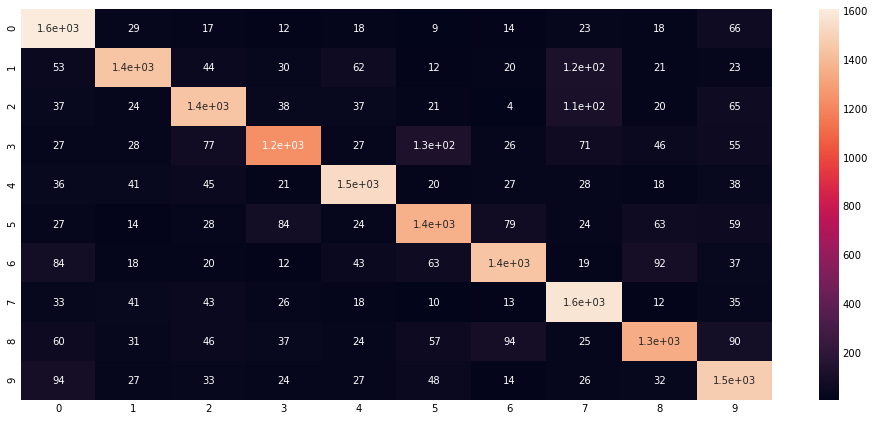

In [51]:
print('Visualizing the confusion matrix')
plt.figure(figsize = (15, 7.2))
sns.heatmap(confusion_matrix(y_test_o, predictions), annot = True) 

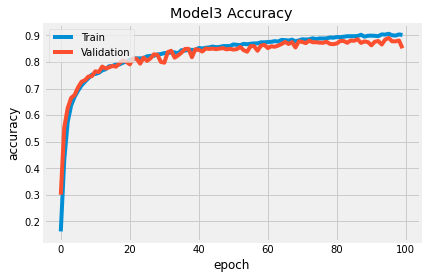

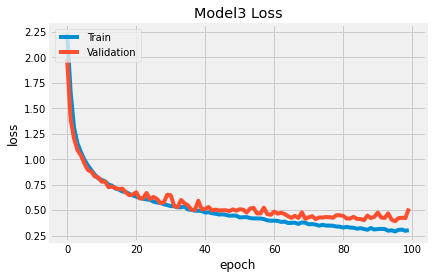

In [58]:
 # summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model3 Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model3 Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show() 

In [53]:
model3.predict_classes(X_test)[5] 

9

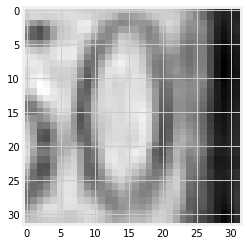

In [54]:
#Showing the image
plt.imshow(X_test[20].reshape(32, 32), cmap = 'gray') 

In [55]:
model3.predict_classes(X_test)[20] 

0

In [56]:
model3.predict_classes(X_test)[10] 

8